# Clustering

Comparer les méthodes ``KMeans`` et ``Spectral Clustering`` (avec DBSCAN)   

Création de 3 datasets :
* 2 avec des clusters non elliptiques (cercles et demi-cercles)
* 1 avec des clusters elliptiques

Le but est de comprendre dans quels cas les méthodes de clustering sont efficaces pour classifier les individus dans leurs groupes respectifs


## Dataset demi-cercles

In [1]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=int(1e3), noise=0.1, random_state=0)
print(X_moon.shape)
print(y_moon.shape)

(1000, 2)
(1000,)


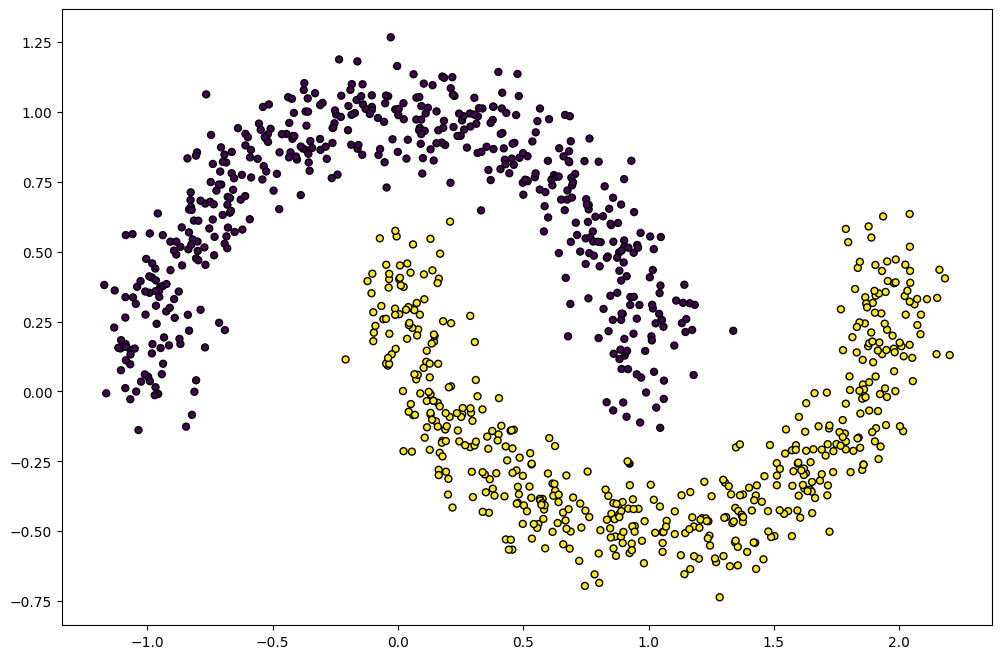

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.scatter(X_moon[:, 0], X_moon[:, 1], marker='o', c=y_moon, s=25, edgecolor='k')

## Dataset cercles

In [3]:
from sklearn.datasets import make_circles

X_circle, y_circle = make_circles(n_samples=int(1e3), noise=0.05, random_state=0, factor=0.6)
print(X_circle.shape)
print(y_circle.shape)

(1000, 2)
(1000,)


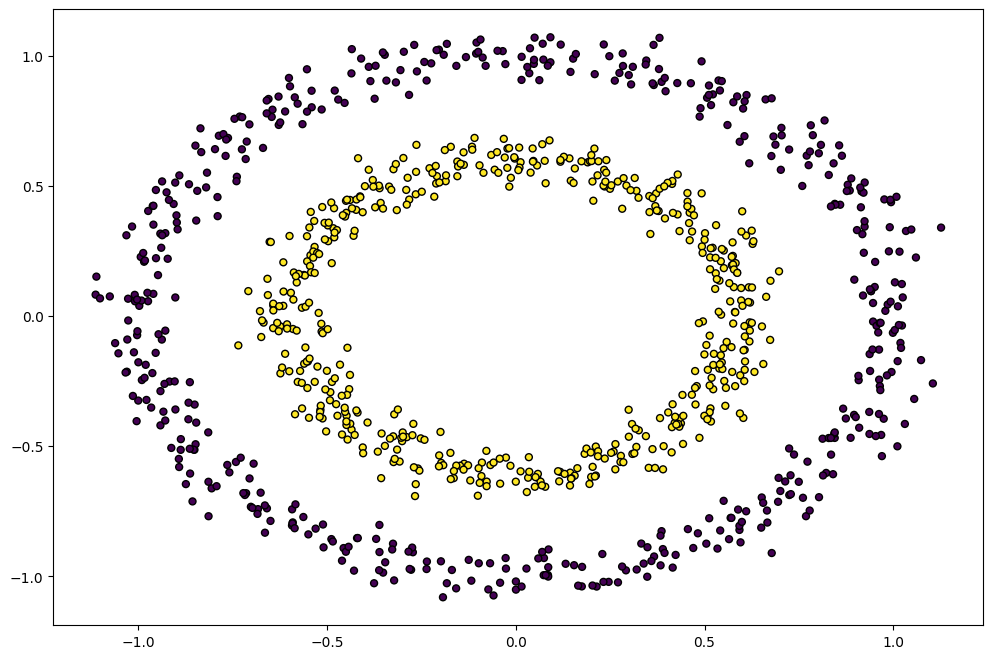

In [4]:
plt.figure(figsize=(12, 8))

plt.scatter(X_circle[:, 0], X_circle[:, 1], marker='o', c=y_circle, s=25, edgecolor='k')

## Dataset elliptique

In [5]:
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(n_samples=int(1e3), n_features=2, centers=3, cluster_std=0.6, random_state=0)

print(X_blob.shape)
print(y_blob.shape)

(1000, 2)
(1000,)


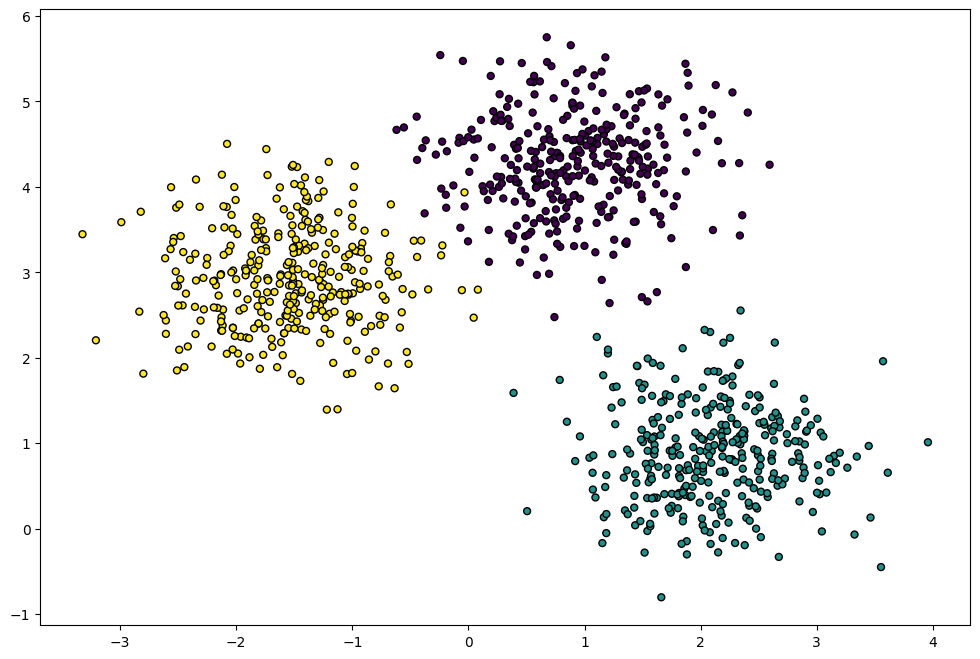

In [6]:
plt.figure(figsize=(12, 8))

plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='o', c=y_blob, s=25, edgecolor='k')

## Kmeans

### Import des librairies nécessaires

In [19]:
# kmeans clustering
from sklearn.cluster import KMeans
import numpy as np

### Dataset demi-cercles

**Entrainement du modèle**

In [ ]:
kmeans = KMeans(n_clusters=2, init="k-means++", max_iter=20, random_state=1, n_jobs=-1).fit(X_moon)

**Nombre d'itérations nécessaires pour converger**

In [ ]:
kmeans.n_iter_

6

**Labellisation de chaque individu / ligne**

In [ ]:
kmeans.labels_[:10]

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

**Ajout pour chaque ligne du label associé**

Pour le tableau X_moon, on ajoute en position 2 [0, 1, 2], les labels, en axis=1 (mode colonne)

In [ ]:
X_moon_lbl = np.insert(X_moon, 2, kmeans.labels_, axis=1)

**Coordonnées des deux centre de gravité G / centroïdes**

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-0.1939831 ,  0.57057055],
       [ 1.21616841, -0.08222647]])

**Affichage des résultats**

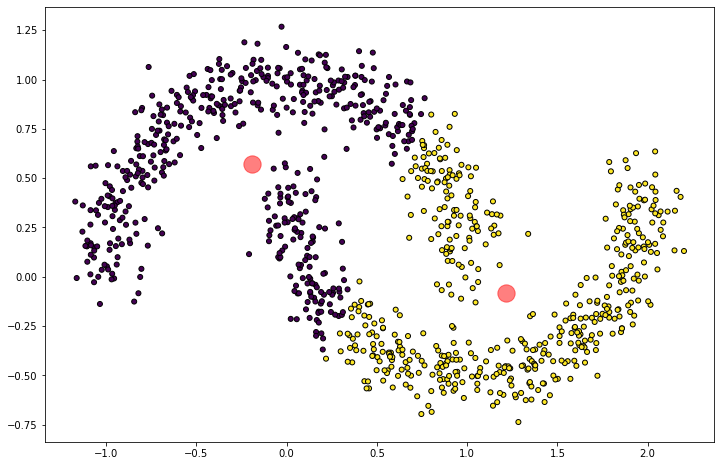

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X_moon_lbl[:, 0], X_moon_lbl[:, 1], marker='o', c=X_moon_lbl[:, 2], s=25, edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)

### Dataset cercles

In [ ]:
kmeans = KMeans(n_clusters=2, init="k-means++", max_iter=20, random_state=1, n_jobs=-1).fit(X_circle)

In [ ]:
X_circle_lbl = np.insert(X_circle, 2, kmeans.labels_, axis=1)

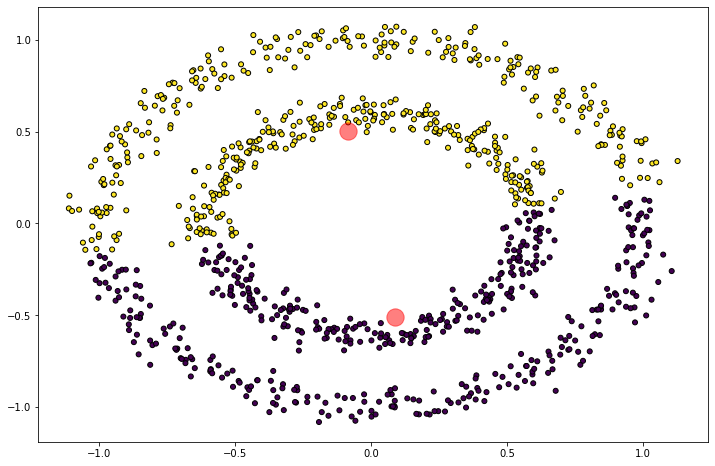

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X_circle_lbl[:, 0], X_circle_lbl[:, 1], marker='o', c=X_circle_lbl[:, 2], s=25, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, alpha=0.5)

### Dataset elliptique



In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=20, random_state=1, n_jobs=-1).fit(X_blob)

In [ ]:
X_blob_lbl = np.insert(X_blob, 2, kmeans.labels_, axis=1)

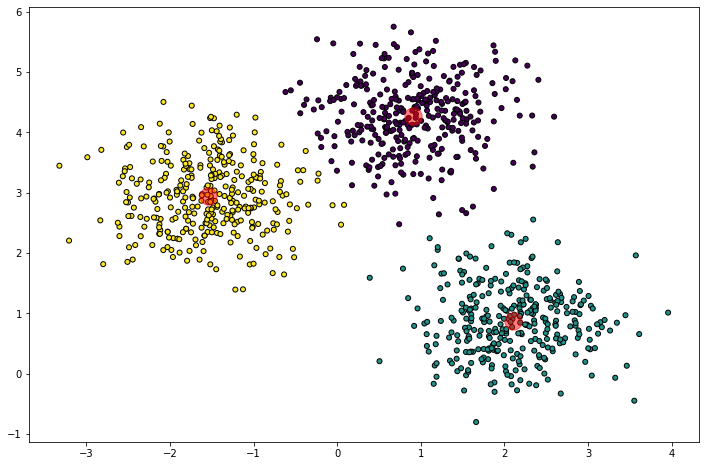

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X_blob_lbl[:, 0], X_blob_lbl[:, 1], marker='o', c=X_blob_lbl[:, 2], s=25, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=300, alpha=0.5)

## DBSCAN

### Dataset demi-cercles

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.13, min_samples=3, metric='euclidean', n_jobs=-1).fit(X_moon)

**Index des points core**

In [ ]:
dbscan.core_sample_indices_[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
X_moon_lbl_db = np.insert(X_moon, 2, dbscan.labels_, axis=1)

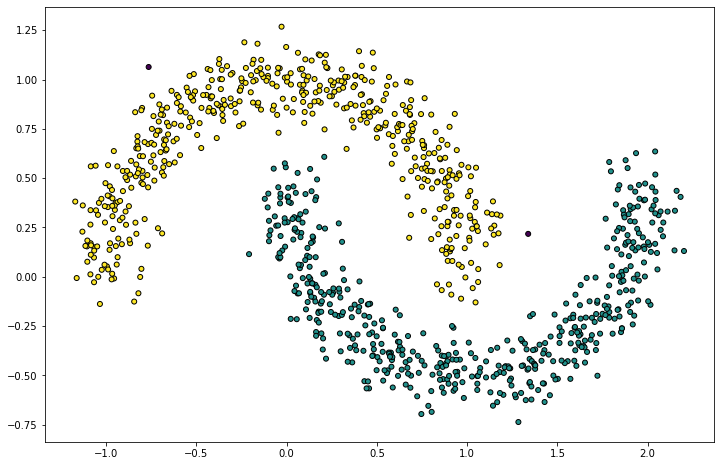

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X_moon_lbl_db[:, 0], X_moon_lbl_db[:, 1], marker='o', c=X_moon_lbl_db[:, 2], s=25, edgecolor='k')

### Find optimal eps

Déterminer k plus proches voisins : ici k=20    
Calculer la moyenne des distances entre chaque point et ses X plus proches voisins

In [7]:
# A ne pas confondre avec KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [8]:
nearn = NearestNeighbors(n_neighbors=20, n_jobs=-1).fit(X_moon)

On récupère les distances et les indices des voisins (20) de chaque points

In [10]:
distances, indices = nearn.kneighbors(X_moon)

On calcul la moyenne des distances des voisins de chaque point

In [20]:
distance_mean = [np.mean(arr) for arr in distances]

On tri par ordre croissant les distances  
On affiche la courbe de elbow afin de trouver le point de elbow  
Le point de elbow est "le coude" de la courbe, le dernier point avant des sauts plus importants

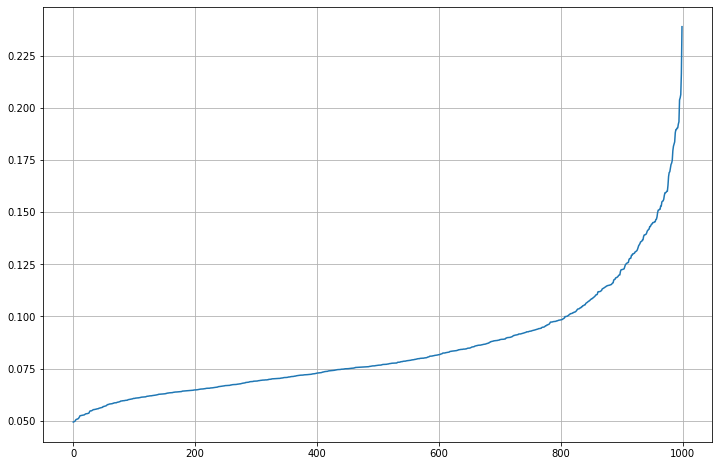

In [ ]:
plt.figure(figsize=(12, 8))

distance_mean = np.sort(distance_mean, axis=0)
plt.grid(True)
plt.plot(distance_mean)

### Dataset cercles

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean', n_jobs=-1).fit(X_circle)

In [ ]:
X_circle_lbl_db = np.insert(X_circle, 2, dbscan.labels_, axis=1)

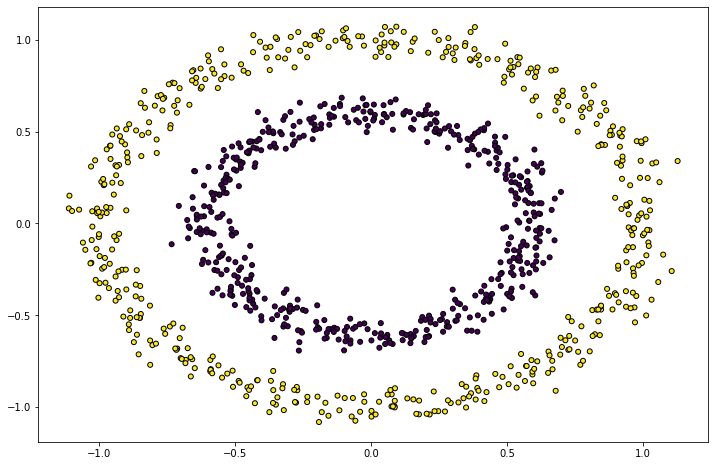

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X_circle_lbl_db[:, 0], X_circle_lbl_db[:, 1], marker='o', c=X_circle_lbl_db[:, 2], s=25, edgecolor='k')

# Dataset elliptique

In [ ]:
# 0.22 / 2
dbscan = DBSCAN(eps=0.32, min_samples=7, metric='euclidean', n_jobs=-1).fit(X_blob)

In [ ]:
X_blob_lbl_db = np.insert(X_blob, 2, dbscan.labels_, axis=1)

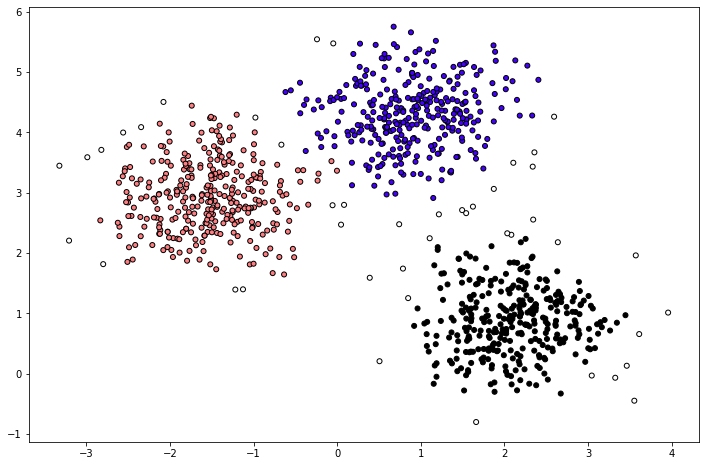

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X_blob_lbl_db[:, 0], X_blob_lbl_db[:, 1], marker='o', c=X_blob_lbl_db[:, 2], s=25, edgecolor='k', cmap="gnuplot2_r")